In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import datetime
# RBA quarterly inflation rates from 1922
csv_file = 'https://www.rba.gov.au/statistics/tables/csv/g1-data.csv'
local_file = '../data/g1-data.csv'
max_age = datetime.timedelta(days=1)
if not os.path.exists(local_file) or datetime.datetime.now() - datetime.datetime.fromtimestamp(os.path.getmtime(local_file)) > max_age:
    import urllib.request
    urllib.request.urlretrieve(csv_file, local_file)

In [3]:
# First 10 rows are descriptive header rows and data is not UTF-8 encoded, use Windows code page 1252 instead
# GCPIAGYP = Consumer Price Index: All Groups, Percentage change from corresponding quarter of previous year
df = pd.read_csv(local_file, skiprows=10, encoding='cp1252', usecols=['Series ID', 'GCPIAGYP'])
df.dropna(subset=['Series ID'], inplace=True)
df.tail()

,Series ID,GCPIAGYP
404,Jun-2023,6.0
405,Sep-2023,5.4
406,Dec-2023,NaN
407,Mar-2024,NaN
408,Jun-2024,NaN


In [14]:
df.rename(columns={'Series ID': 'Date'}, inplace=True)
# source data is in the format 'Jan-1959' %b-%Y
df['Date'] = pd.to_datetime(df['Date'], format='%b-%Y')
df.set_index('Date', inplace=True)

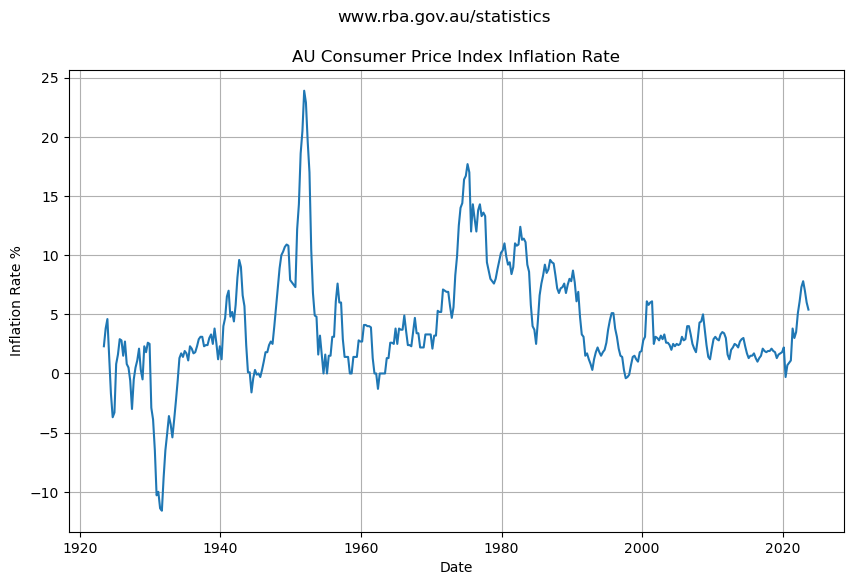

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GCPIAGYP'])
plt.xlabel('Date')
plt.ylabel('Inflation Rate %')
plt.suptitle('www.rba.gov.au/statistics')
plt.title('AU Consumer Price Index Inflation Rate')
plt.grid(True)
plt.show()

In [7]:
df['3_yr_rolling'] = df['GCPIAGYP'].rolling(window=36, min_periods=1).mean()
df.tail()

,Date,GCPIAGYP,3_yr_rolling
404,2023-06-01,6.0,2.530556
405,2023-09-01,5.4,2.616667
406,2023-12-01,NaN,2.642857
407,2024-03-01,NaN,2.682353
408,2024-06-01,NaN,2.718182


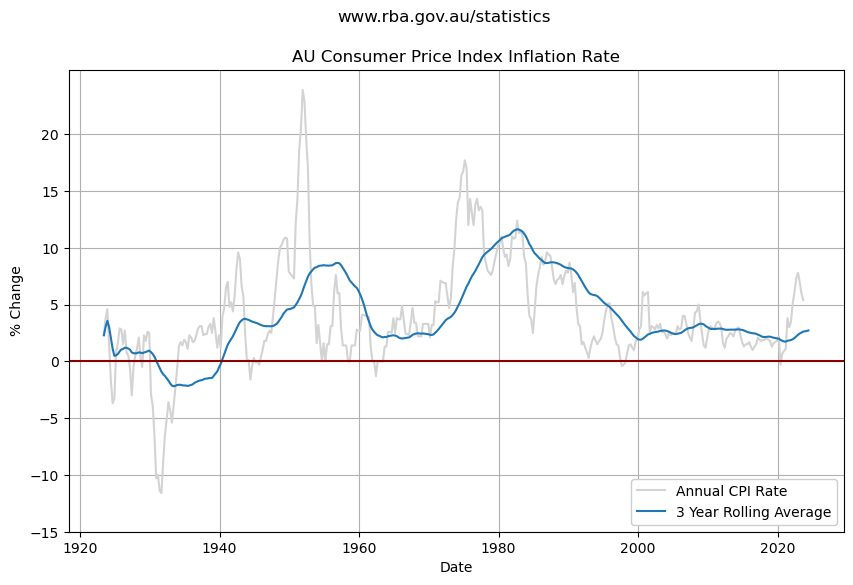

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GCPIAGYP'], label='Annual CPI Rate', color='lightgrey')
plt.plot(df.index, df['3_yr_rolling'], label='3 Year Rolling Average')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.suptitle('www.rba.gov.au/statistics')
plt.title('AU Consumer Price Index Inflation Rate')
plt.yticks(range(-15, 25, 5))
plt.grid(True)
plt.axhline(y=0, color='darkred')  # Add horizontal line at y=0
legend = plt.legend(loc='lower right')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.98)
plt.show()